# Keras による MNIST の分類モデルの生成

# 1. 事前準備

## 必要なライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Keras 関連
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.activations import linear

## MNIST データの取得とスケール変換

In [2]:
#  MNIST　データを Keras を使って取得
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

# 0-1 スケールに変換
X_train, X_test = X_train/255.0, X_test/255.0

11493376/11490434 [==============================] - 1s 0us/step


# 2. モデルの生成と学習

## モデルの生成

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:3]), # フラット化のための層
    keras.layers.Dense(64, activation='relu'), # レイヤ1。64ノードで活性化関数は ReLU 関数
    keras.layers.Dense(32, activation='relu'), # レイヤ2。32ノードで活性化関数は　ReLU 関数
    keras.layers.Dense(10, activation='softmax')]) # レイヤ3。10ノードで活性化関数はソフトマックス関数

## コンパイル

In [4]:
model.compile(
    optimizer=SGD(learning_rate=0.01), # 最適化アルゴリズムに確率的勾配降下法を利用
    loss='sparse_categorical_crossentropy', # 損失関数に交差エントロピー誤差を利用
    metrics=['accuracy']) # 評価メトリクスに正解率を利用

## モデルのサマリを表示

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## パラメータの数を計算

In [6]:
784 * 64 + 64 * 32 + 32 * 10 + 64 + 32 + 10

52650

## モデルの学習

In [7]:
model.fit(
    X_train, # 学習データ
    Y_train, # 学習データの正解データ
    batch_size=50, # ミニバッチサイズ
    epochs=20, # エポック数
    validation_data=(X_test, Y_test)) # エポックごとに評価に使うデータ
                                                                # ここではテストデータとその正解データを指定

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.8295 - accuracy: 0.7807 - val_loss: 0.4037 - val_accuracy: 0.8876
Epoch 2/20
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3645 - accuracy: 0.8963 - val_loss: 0.3108 - val_accuracy: 0.9106
Epoch 3/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3023 - accuracy: 0.9124 - val_loss: 0.2694 - val_accuracy: 0.9237
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2667 - accuracy: 0.9229 - val_loss: 0.2434 - val_accuracy: 0.9279
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2411 - accuracy: 0.9307 - val_loss: 0.2245 - val_accuracy: 0.9329
Epoch 6/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2205 - accuracy: 0.9369 - val_loss: 0.2066 - val_accuracy: 0.9383
Epoch 7/20
60000/60000 [==============================] 

# 3. 画像の分類

## 画像の表示

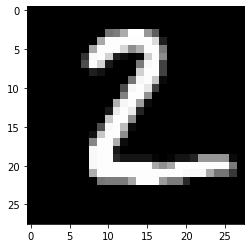

In [5]:
image_index = 1
plt.imshow(X_test[image_index], cmap=plt.cm.gray)

## 推論

In [6]:
Y_hat = model.predict(X_test) # すべてのテストデータの推論結果
print('Y_hat.shape:', Y_hat.shape) # 推論結果の型を表示
print('Y_hat[image_index]:\n', Y_hat[image_index]) # image_index = 1 の推論結果を表示

Y_hat.shape: (10000, 10)
Y_hat[image_index]:
 [4.3516274e-04 1.0968289e-04 9.9192458e-01 5.4151248e-03 4.3289603e-09
 1.1258811e-03 6.9828215e-04 1.4092737e-08 2.9138630e-04 9.4987920e-09]


## 分類

In [8]:
classified_class = np.argmax(Y_hat[image_index]) # image_index = 1 の分類結果を取得
score = np.max(Y_hat[image_index]) # image_index = 1 のスコアを取得

# 分類結果とスコアを表示
print('Prediction: {0} - score {1:.2f}%'.format(classified_class, score * 100))

Prediction: 2 - score 99.19%


# 4. モデルの保存

## 開発したモデルの保存

In [24]:
# model.save('../../models/mnist.h5')

## モデルのロード

In [3]:
# restored_model = keras.models.load_model('../../models/mnist.h5')

## logits 版のモデルの保存

In [26]:
# model.layers[-1].activation = linear
# model.save('../../models/mnist_logits.h5')